In [37]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
from tqdm import tqdm

from utils import *


In [2]:
utils_io = UtilsIO()


In [3]:
def plot_spectrogram(audio, f0):
    times = librosa.times_like(f0, sr=16000)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    fig, ax = plt.subplots(figsize=(22,8))
    img = librosa.display.specshow(D,x_axis='time',y_axis='log',ax=ax, sr=16000)
    ax.set(title="pYIN fundamental frequency estimation")
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')

In [109]:
def get_pitch(audio, fmin, fmax, thr_prob, verbose=False, plot_spec=False):

    f0, voiced_flag, voiced_prob = librosa.pyin(y=audio, fmin=fmin, fmax=fmax, sr=16000, frame_length=2048, hop_length=None)

    i_prob = np.argwhere(voiced_prob > thr_prob)
    f0_prob = f0[i_prob]
    f0_mean = round(np.mean(f0_prob), 2)
    f0_std = round(np.std(f0_prob), 2)

    if len(f0_prob) < 0:
        thr_prob = 0.5
        i_prob = np.argwhere(voiced_prob > thr_prob)
        f0_prob = f0[i_prob]
        f0_mean = round(np.mean(f0_prob), 2)
        f0_std = round(np.std(f0_prob), 2)

        if len(f0_prob) < 0:
            thr_prob = 0.4
            i_prob = np.argwhere(voiced_prob > thr_prob)
            f0_prob = f0[i_prob]
            f0_mean = round(np.mean(f0_prob), 2)
            f0_std = round(np.std(f0_prob), 2)

    print("pitch mean: ", f0_mean, "pitch std: ", f0_std)

    if verbose:
        plt.stem(f0)
        plt.title("f0")
        plt.show()

        plt.stem(voiced_prob)
        plt.title("voiced_prob")
        plt.show()

        plt.stem(f0_prob)
        plt.title("f0_prob")
        plt.show()

    if plot_spec:
        plot_spectrogram(audio, f0)

    return f0_prob, f0_mean, f0_std


In [5]:
path = "../GPS_cmd_16k_renamed.list"
list_gps = utils_io.read_txt(path)
list_gps

['/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_001.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_002.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_003.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_004.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_005.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_006.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_007.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_008.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_009.wav',
 '/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_re

In [23]:
path = list_gps[200]
path

'/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_M001_001.wav'

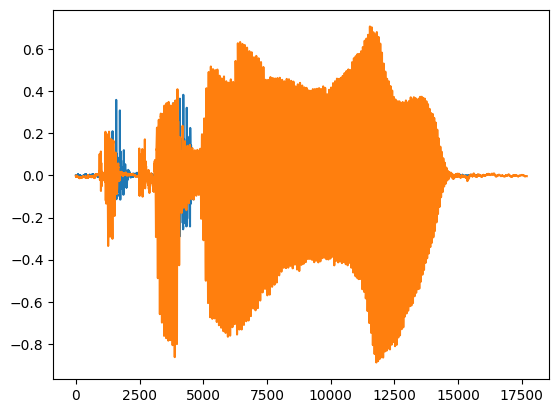

In [31]:
audio_m = utils_io.load_audio(list_gps[200], verbose=True)
audio_f = utils_io.load_audio(list_gps[0], verbose=True)

pitch mean:  101.97 pitch std:  0.93


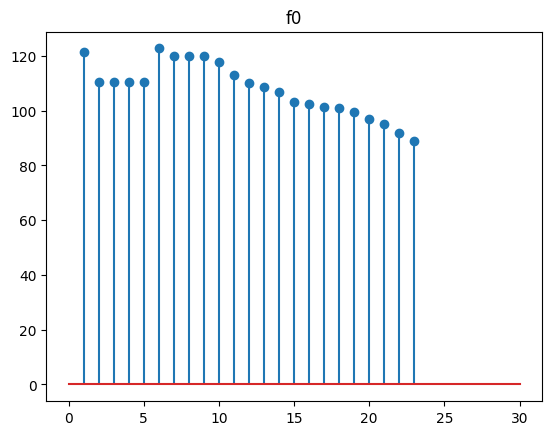

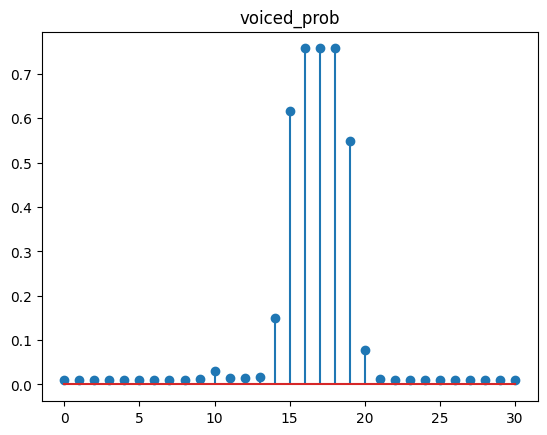

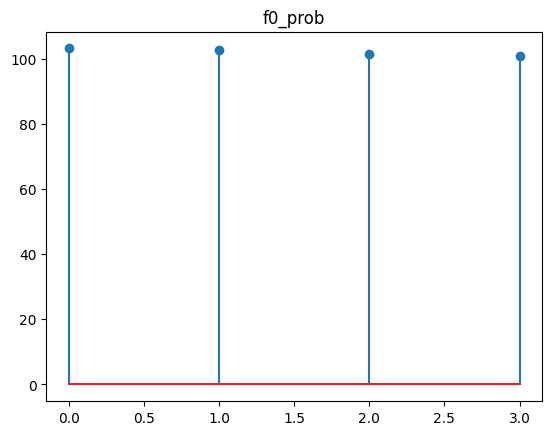

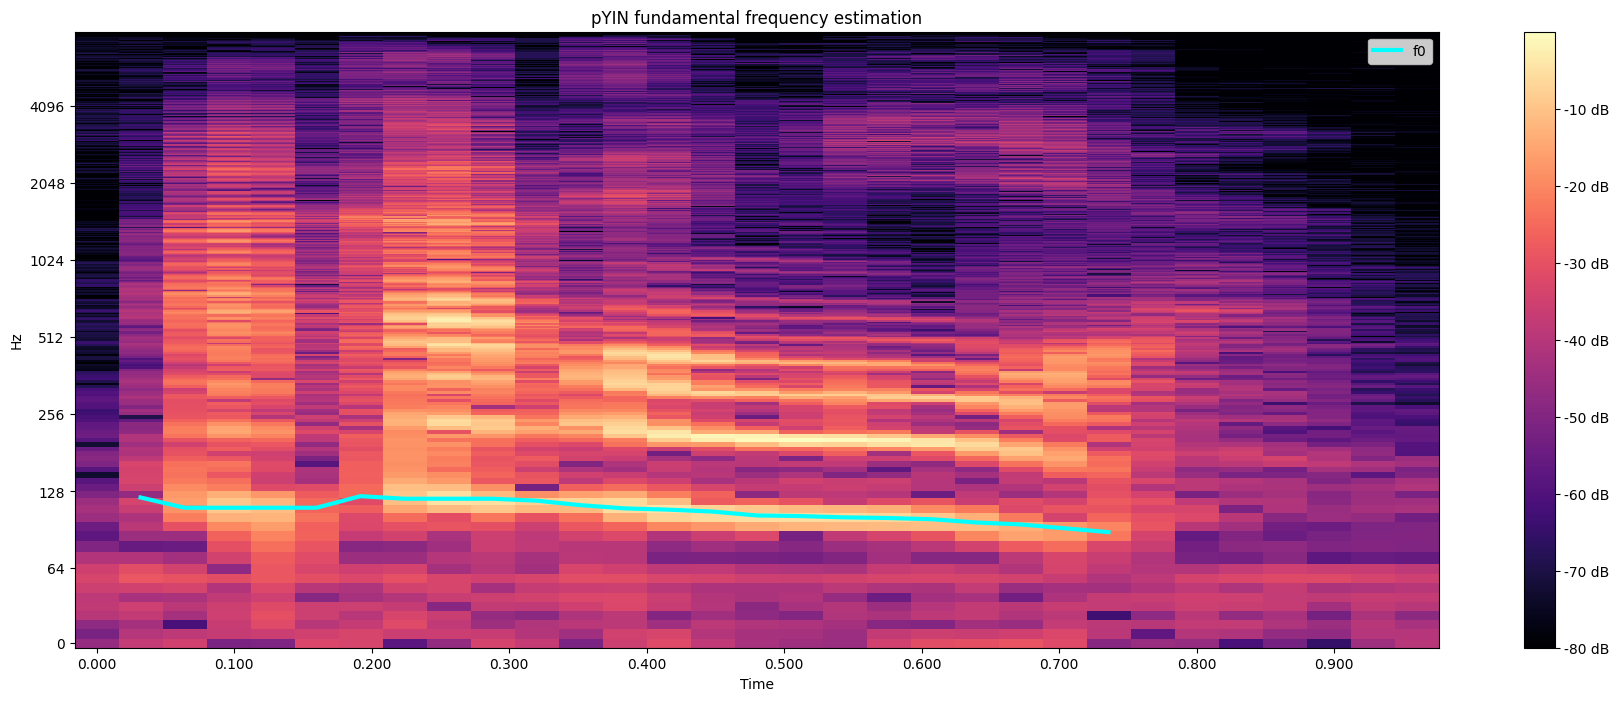

In [107]:
fmin = 20
fmax = 800
thr_prob = 0.6

f0_prob, f0_mean, f0_std = get_pitch(audio_m, fmin, fmax, thr_prob, verbose=True, plot_spec=True)


pitch mean:  224.63 pitch std:  34.86


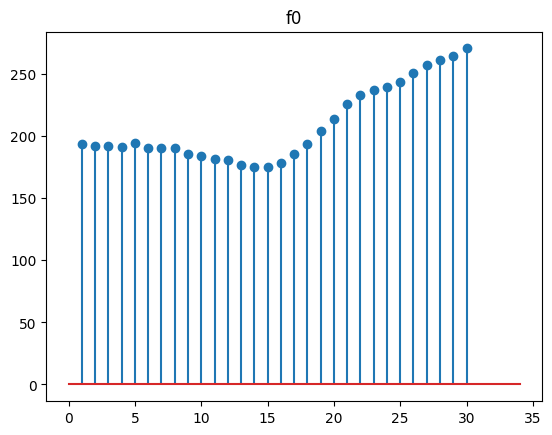

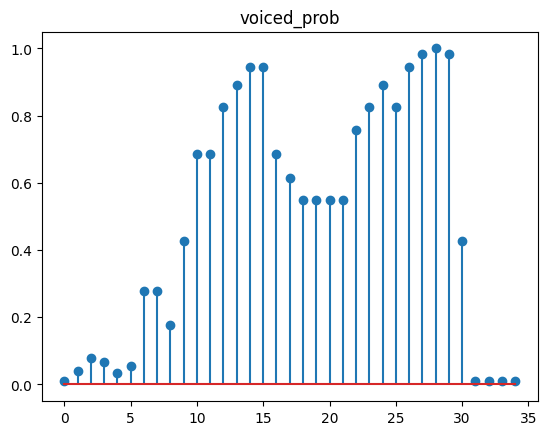

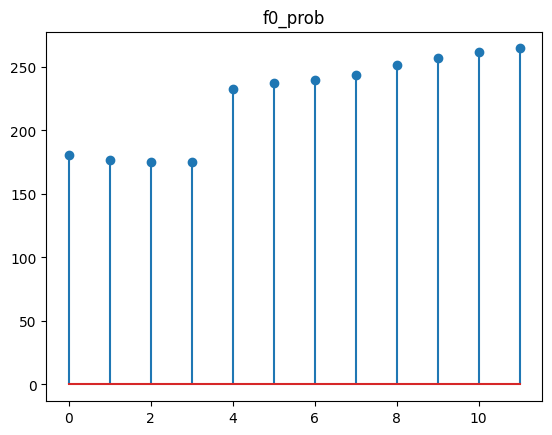

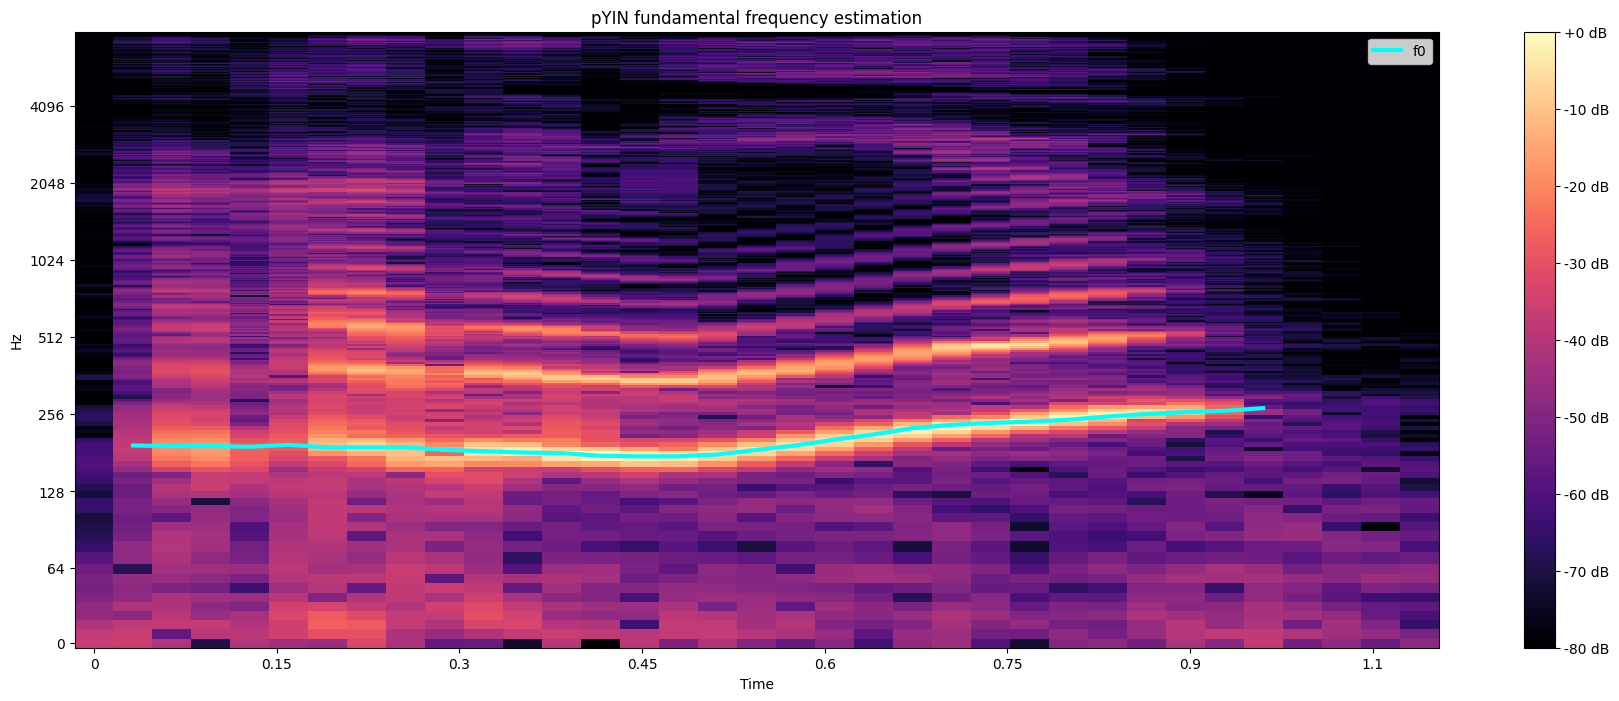

In [33]:
f0_prob, f0_mean, f0_std = get_pitch(audio_f, fmin, fmax, thr_prob, verbose=True, plot_spec=True)

In [ ]:
fmin = 10
fmax = 800
thr_prob = 0.6

genders = []
f0_probs = []
f0_stds = []
f0_means = []
users = []

for path in tqdm(list_gps):
    #input()
    user = os.path.basename(path).split("_")[1]
    gender = user[0]
    genders.append(gender)
    users.append(user)
    #print(gender)
    audio = utils_io.load_audio(path)
    #print(path)
    f0_prob, f0_mean, f0_std = get_pitch(audio, fmin, fmax, thr_prob)
    #if f0_mean == "nan":
    #    print(path)
    #    break
    f0_probs.append(f0_prob)
    f0_stds.append(f0_std)
    f0_means.append(f0_mean)


  0%|          | 0/4000 [00:00<?, ?it/s]/tmp/ipykernel_9752/4095428982.py:3: UserWarning: With fmin=10.000, sr=16000 and frame_length=2048, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=15.625 or frame_length=3201.
  f0, voiced_flag, voiced_prob = librosa.pyin(y=audio, fmin=fmin, fmax=fmax, sr=16000, frame_length=2048, hop_length=None)
  0%|          | 1/4000 [00:00<24:57,  2.67it/s]

pitch mean:  214.09 pitch std:  35.3


  0%|          | 2/4000 [00:00<22:57,  2.90it/s]

pitch mean:  206.25 pitch std:  32.16


  0%|          | 3/4000 [00:01<22:05,  3.01it/s]

pitch mean:  203.81 pitch std:  28.43


  0%|          | 4/4000 [00:01<22:03,  3.02it/s]

pitch mean:  204.22 pitch std:  28.53


  0%|          | 5/4000 [00:01<21:51,  3.05it/s]

pitch mean:  200.89 pitch std:  25.54


  0%|          | 6/4000 [00:02<22:00,  3.02it/s]

pitch mean:  207.96 pitch std:  24.75


  0%|          | 7/4000 [00:02<21:39,  3.07it/s]

pitch mean:  201.2 pitch std:  25.92


  0%|          | 8/4000 [00:02<21:23,  3.11it/s]

pitch mean:  197.84 pitch std:  29.48


  0%|          | 9/4000 [00:02<21:45,  3.06it/s]

pitch mean:  210.89 pitch std:  31.05


  0%|          | 10/4000 [00:03<22:07,  3.01it/s]

pitch mean:  222.47 pitch std:  44.8


  0%|          | 11/4000 [00:03<21:48,  3.05it/s]

pitch mean:  243.02 pitch std:  43.73


  0%|          | 12/4000 [00:03<22:23,  2.97it/s]

pitch mean:  244.67 pitch std:  19.74


  0%|          | 13/4000 [00:04<22:10,  3.00it/s]

pitch mean:  235.58 pitch std:  34.24


  0%|          | 14/4000 [00:04<21:58,  3.02it/s]

pitch mean:  252.16 pitch std:  10.62


  0%|          | 15/4000 [00:04<21:34,  3.08it/s]

pitch mean:  254.92 pitch std:  13.76


  0%|          | 16/4000 [00:05<21:02,  3.16it/s]

pitch mean:  251.68 pitch std:  23.77


  0%|          | 17/4000 [00:05<20:32,  3.23it/s]

pitch mean:  244.8 pitch std:  19.07


  0%|          | 18/4000 [00:05<20:16,  3.27it/s]

pitch mean:  256.36 pitch std:  9.22


  0%|          | 19/4000 [00:06<19:24,  3.42it/s]

pitch mean:  250.8 pitch std:  21.07


  0%|          | 20/4000 [00:06<19:27,  3.41it/s]

pitch mean:  246.48 pitch std:  24.93


  1%|          | 21/4000 [00:06<20:28,  3.24it/s]

pitch mean:  251.56 pitch std:  35.48


  1%|          | 22/4000 [00:07<21:03,  3.15it/s]

pitch mean:  237.08 pitch std:  29.09


  1%|          | 23/4000 [00:07<20:51,  3.18it/s]

pitch mean:  238.24 pitch std:  32.94


  1%|          | 24/4000 [00:07<21:10,  3.13it/s]

pitch mean:  228.95 pitch std:  29.5


  1%|          | 25/4000 [00:08<20:53,  3.17it/s]

pitch mean:  236.9 pitch std:  31.83


  1%|          | 26/4000 [00:08<20:32,  3.22it/s]

pitch mean:  237.89 pitch std:  36.32


  1%|          | 27/4000 [00:08<20:36,  3.21it/s]

pitch mean:  238.59 pitch std:  41.52


  1%|          | 28/4000 [00:08<21:26,  3.09it/s]

pitch mean:  223.71 pitch std:  27.92


  1%|          | 29/4000 [00:09<21:26,  3.09it/s]

pitch mean:  245.38 pitch std:  42.62


  1%|          | 30/4000 [00:09<20:12,  3.27it/s]

pitch mean:  199.86 pitch std:  1.73


  1%|          | 31/4000 [00:09<21:10,  3.12it/s]

pitch mean:  230.77 pitch std:  17.04


  1%|          | 32/4000 [00:10<22:15,  2.97it/s]

pitch mean:  238.07 pitch std:  25.8


  1%|          | 33/4000 [00:10<22:45,  2.90it/s]

pitch mean:  229.02 pitch std:  18.11


  1%|          | 34/4000 [00:10<22:27,  2.94it/s]

pitch mean:  234.11 pitch std:  16.2


  1%|          | 35/4000 [00:11<22:32,  2.93it/s]

pitch mean:  234.38 pitch std:  16.85


  1%|          | 36/4000 [00:11<22:04,  2.99it/s]

pitch mean:  239.07 pitch std:  18.6


  1%|          | 37/4000 [00:12<22:34,  2.93it/s]

pitch mean:  236.57 pitch std:  23.52


  1%|          | 38/4000 [00:12<22:22,  2.95it/s]

pitch mean:  237.41 pitch std:  22.88


  1%|          | 39/4000 [00:12<22:23,  2.95it/s]

pitch mean:  234.78 pitch std:  18.6


  1%|          | 40/4000 [00:12<21:40,  3.05it/s]

pitch mean:  213.07 pitch std:  21.89


  1%|          | 41/4000 [00:13<22:02,  2.99it/s]

pitch mean:  209.47 pitch std:  22.26


  1%|          | 42/4000 [00:13<21:51,  3.02it/s]

pitch mean:  197.81 pitch std:  14.78


  1%|          | 43/4000 [00:13<21:49,  3.02it/s]

pitch mean:  196.82 pitch std:  12.65


  1%|          | 44/4000 [00:14<20:26,  3.23it/s]

pitch mean:  209.38 pitch std:  17.78


  1%|          | 45/4000 [00:14<20:04,  3.28it/s]

pitch mean:  206.05 pitch std:  15.66


  1%|          | 46/4000 [00:14<21:01,  3.14it/s]

pitch mean:  219.99 pitch std:  20.18


  1%|          | 47/4000 [00:15<21:13,  3.10it/s]

pitch mean:  203.1 pitch std:  11.58


  1%|          | 48/4000 [00:15<20:59,  3.14it/s]

pitch mean:  208.21 pitch std:  14.35


  1%|          | 49/4000 [00:15<21:20,  3.09it/s]

pitch mean:  202.35 pitch std:  9.32


  1%|▏         | 50/4000 [00:16<19:55,  3.30it/s]

pitch mean:  187.43 pitch std:  21.23


  1%|▏         | 51/4000 [00:16<19:55,  3.30it/s]

pitch mean:  195.32 pitch std:  15.4


  1%|▏         | 52/4000 [00:16<20:14,  3.25it/s]

pitch mean:  190.57 pitch std:  11.83


  1%|▏         | 53/4000 [00:17<20:19,  3.24it/s]

pitch mean:  192.66 pitch std:  13.88


  1%|▏         | 54/4000 [00:17<19:24,  3.39it/s]

pitch mean:  194.1 pitch std:  10.69


  1%|▏         | 55/4000 [00:17<20:15,  3.25it/s]

pitch mean:  188.51 pitch std:  9.38


  1%|▏         | 56/4000 [01:14<18:52:46, 17.23s/it]

pitch mean:  190.35 pitch std:  11.24
pitch mean:  189.36 pitch std:  10.94
pitch mean:  187.78 pitch std:  7.98
pitch mean:  189.36 pitch std:  8.36
pitch mean:  173.36 pitch std:  3.68
pitch mean:  194.87 pitch std:  12.21
pitch mean:  186.77 pitch std:  8.47
pitch mean:  186.41 pitch std:  8.41
pitch mean:  190.64 pitch std:  6.91
pitch mean:  191.64 pitch std:  11.64
pitch mean:  187.71 pitch std:  5.11
pitch mean:  183.62 pitch std:  5.82
pitch mean:  185.1 pitch std:  4.57
pitch mean:  188.91 pitch std:  6.13
pitch mean:  175.0 pitch std:  13.42


  2%|▏         | 71/4000 [01:19<2:51:07,  2.61s/it] 

pitch mean:  203.62 pitch std:  5.85
pitch mean:  205.5 pitch std:  17.29
pitch mean:  215.98 pitch std:  22.85
pitch mean:  213.02 pitch std:  13.06
pitch mean:  209.7 pitch std:  20.77
pitch mean:  212.8 pitch std:  21.73
pitch mean:  212.68 pitch std:  19.9
pitch mean:  220.71 pitch std:  21.75
pitch mean:  227.87 pitch std:  25.53
pitch mean:  198.4 pitch std:  27.99
pitch mean:  212.49 pitch std:  21.69
pitch mean:  209.09 pitch std:  20.84
pitch mean:  212.62 pitch std:  26.34
pitch mean:  215.83 pitch std:  23.96
pitch mean:  215.98 pitch std:  29.0
pitch mean:  215.76 pitch std:  24.29
pitch mean:  212.73 pitch std:  24.43
pitch mean:  215.36 pitch std:  26.1
pitch mean:  221.16 pitch std:  36.52
pitch mean:  193.27 pitch std:  21.78
pitch mean:  179.25 pitch std:  13.21
pitch mean:  176.54 pitch std:  16.12
pitch mean:  176.64 pitch std:  12.32
pitch mean:  183.53 pitch std:  14.84
pitch mean:  184.73 pitch std:  12.62
pitch mean:  189.01 pitch std:  11.56
pitch mean:  190.87 

  3%|▎         | 119/4000 [01:34<50:19,  1.29it/s] 

pitch mean:  197.52 pitch std:  17.01
pitch mean:  207.49 pitch std:  0.0
pitch mean:  242.99 pitch std:  14.88
pitch mean:  192.06 pitch std:  7.07
pitch mean:  197.17 pitch std:  10.47
pitch mean:  193.23 pitch std:  21.77
pitch mean:  194.52 pitch std:  10.63
pitch mean:  202.03 pitch std:  7.84
pitch mean:  194.46 pitch std:  8.33
pitch mean:  206.65 pitch std:  15.61
pitch mean:  216.99 pitch std:  30.1
pitch mean:  201.32 pitch std:  28.65
pitch mean:  216.36 pitch std:  51.93
pitch mean:  206.57 pitch std:  46.43
pitch mean:  226.29 pitch std:  65.95
pitch mean:  209.38 pitch std:  48.79
pitch mean:  207.84 pitch std:  44.77
pitch mean:  216.14 pitch std:  42.52
pitch mean:  215.68 pitch std:  40.35
pitch mean:  227.42 pitch std:  59.88
pitch mean:  225.68 pitch std:  45.74
pitch mean:  229.36 pitch std:  2.25
pitch mean:  204.82 pitch std:  43.31
pitch mean:  188.29 pitch std:  5.09
pitch mean:  209.74 pitch std:  29.21
pitch mean:  210.69 pitch std:  31.83
pitch mean:  196.76 

  4%|▍         | 167/4000 [01:49<33:55,  1.88it/s]

pitch mean:  205.62 pitch std:  11.13
pitch mean:  210.44 pitch std:  14.08
pitch mean:  208.49 pitch std:  14.03
pitch mean:  214.66 pitch std:  16.67
pitch mean:  214.47 pitch std:  18.37
pitch mean:  206.3 pitch std:  18.67
pitch mean:  210.76 pitch std:  19.08
pitch mean:  208.11 pitch std:  21.97
pitch mean:  211.11 pitch std:  21.96
pitch mean:  208.4 pitch std:  19.7
pitch mean:  209.79 pitch std:  19.94
pitch mean:  211.89 pitch std:  26.59
pitch mean:  221.26 pitch std:  22.76
pitch mean:  225.78 pitch std:  3.54
pitch mean:  185.76 pitch std:  35.48
pitch mean:  193.88 pitch std:  25.53


  5%|▍         | 183/4000 [01:54<30:49,  2.06it/s]

pitch mean:  187.36 pitch std:  27.56
pitch mean:  196.02 pitch std:  26.7
pitch mean:  190.36 pitch std:  28.66
pitch mean:  192.35 pitch std:  28.61
pitch mean:  189.78 pitch std:  28.61
pitch mean:  199.56 pitch std:  21.74
pitch mean:  202.01 pitch std:  27.34
pitch mean:  147.72 pitch std:  19.69
pitch mean:  192.19 pitch std:  18.05
pitch mean:  186.17 pitch std:  10.58
pitch mean:  186.79 pitch std:  11.84
pitch mean:  187.14 pitch std:  11.86
pitch mean:  191.0 pitch std:  13.33
pitch mean:  189.34 pitch std:  9.8
pitch mean:  191.18 pitch std:  10.84
pitch mean:  192.94 pitch std:  10.31
pitch mean:  191.46 pitch std:  8.42
pitch mean:  194.6 pitch std:  12.84
pitch mean:  101.97 pitch std:  0.93
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  118.49 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  122.67 pitch std:  0.0
pitch mean:  97.92 pitch std:  0.0
pitch mean:  97.93 pitch std:  0.57
pitch mean

  5%|▌         | 214/4000 [02:04<26:57,  2.34it/s]

pitch mean:  136.41 pitch std:  3.35
pitch mean:  140.26 pitch std:  4.22
pitch mean:  138.2 pitch std:  3.05
pitch mean:  138.66 pitch std:  2.19
pitch mean:  144.29 pitch std:  7.18
pitch mean:  140.9 pitch std:  5.09
pitch mean:  136.33 pitch std:  2.79
pitch mean:  109.28 pitch std:  0.0
pitch mean:  103.45 pitch std:  0.3
pitch mean:  102.13 pitch std:  4.03
pitch mean:  96.85 pitch std:  7.24
pitch mean:  98.94 pitch std:  6.48
pitch mean:  97.36 pitch std:  5.99
pitch mean:  100.48 pitch std:  10.54
pitch mean:  118.65 pitch std:  11.1
pitch mean:  126.39 pitch std:  1.42
pitch mean:  115.89 pitch std:  9.93
pitch mean:  125.53 pitch std:  0.0
pitch mean:  129.21 pitch std:  0.0
pitch mean:  107.73 pitch std:  4.93
pitch mean:  108.09 pitch std:  7.62
pitch mean:  107.98 pitch std:  4.97
pitch mean:  104.53 pitch std:  4.25
pitch mean:  108.42 pitch std:  3.02
pitch mean:  105.92 pitch std:  1.17
pitch mean:  108.92 pitch std:  7.59
pitch mean:  nan pitch std:  nan
pitch mean:  

  6%|▌         | 248/4000 [02:14<23:45,  2.63it/s]

pitch mean:  89.28 pitch std:  0.0
pitch mean:  114.51 pitch std:  3.56
pitch mean:  80.0 pitch std:  0.0
pitch mean:  127.91 pitch std:  12.61
pitch mean:  126.98 pitch std:  8.07
pitch mean:  124.57 pitch std:  8.68
pitch mean:  120.46 pitch std:  6.96
pitch mean:  126.72 pitch std:  9.59
pitch mean:  125.0 pitch std:  8.26
pitch mean:  122.81 pitch std:  7.78
pitch mean:  124.66 pitch std:  6.58
pitch mean:  124.38 pitch std:  8.42
pitch mean:  119.9 pitch std:  7.17
pitch mean:  110.85 pitch std:  4.38
pitch mean:  111.43 pitch std:  8.74
pitch mean:  110.22 pitch std:  5.96
pitch mean:  109.86 pitch std:  6.43


  7%|▋         | 265/4000 [02:19<22:36,  2.75it/s]

pitch mean:  109.89 pitch std:  6.97
pitch mean:  108.68 pitch std:  4.73
pitch mean:  111.7 pitch std:  7.74
pitch mean:  109.53 pitch std:  7.56
pitch mean:  112.49 pitch std:  7.64
pitch mean:  103.44 pitch std:  3.4
pitch mean:  96.8 pitch std:  0.46
pitch mean:  93.86 pitch std:  0.26
pitch mean:  96.96 pitch std:  0.65
pitch mean:  97.68 pitch std:  0.59
pitch mean:  101.67 pitch std:  0.83
pitch mean:  99.96 pitch std:  0.91
pitch mean:  99.64 pitch std:  0.87
pitch mean:  102.12 pitch std:  1.24
pitch mean:  96.92 pitch std:  0.9
pitch mean:  104.35 pitch std:  0.0
pitch mean:  128.05 pitch std:  19.03


  7%|▋         | 282/4000 [02:24<21:26,  2.89it/s]

pitch mean:  127.66 pitch std:  14.5
pitch mean:  128.76 pitch std:  12.88
pitch mean:  126.5 pitch std:  11.99
pitch mean:  127.68 pitch std:  14.61
pitch mean:  129.48 pitch std:  13.78
pitch mean:  133.87 pitch std:  9.3
pitch mean:  127.51 pitch std:  13.55
pitch mean:  126.57 pitch std:  11.2
pitch mean:  125.99 pitch std:  12.14
pitch mean:  178.18 pitch std:  37.9
pitch mean:  196.59 pitch std:  22.72
pitch mean:  189.72 pitch std:  26.6
pitch mean:  181.16 pitch std:  31.61
pitch mean:  194.58 pitch std:  23.07
pitch mean:  188.12 pitch std:  26.51
pitch mean:  183.09 pitch std:  28.54
pitch mean:  201.86 pitch std:  2.17
pitch mean:  201.89 pitch std:  2.01
pitch mean:  127.21 pitch std:  4.31
pitch mean:  96.8 pitch std:  0.73
pitch mean:  104.32 pitch std:  16.63
pitch mean:  98.72 pitch std:  11.91
pitch mean:  104.31 pitch std:  14.99
pitch mean:  95.22 pitch std:  0.55
pitch mean:  107.34 pitch std:  16.03
pitch mean:  99.44 pitch std:  10.85
pitch mean:  106.01 pitch std

  8%|▊         | 309/4000 [02:34<21:51,  2.81it/s]

pitch mean:  106.05 pitch std:  14.57
pitch mean:  95.36 pitch std:  6.68
pitch mean:  124.36 pitch std:  20.28
pitch mean:  104.16 pitch std:  24.57
pitch mean:  104.59 pitch std:  21.06
pitch mean:  106.3 pitch std:  23.08
pitch mean:  100.0 pitch std:  18.05
pitch mean:  95.1 pitch std:  13.91
pitch mean:  97.72 pitch std:  13.11
pitch mean:  96.18 pitch std:  14.32
pitch mean:  102.9 pitch std:  16.4
pitch mean:  85.32 pitch std:  1.27
pitch mean:  104.49 pitch std:  1.63


  8%|▊         | 322/4000 [02:39<22:01,  2.78it/s]

pitch mean:  110.05 pitch std:  1.78
pitch mean:  115.51 pitch std:  5.26
pitch mean:  115.46 pitch std:  14.57
pitch mean:  113.3 pitch std:  7.17
pitch mean:  126.82 pitch std:  28.45
pitch mean:  124.93 pitch std:  20.38
pitch mean:  129.86 pitch std:  20.21
pitch mean:  133.71 pitch std:  27.11
pitch mean:  100.83 pitch std:  2.66
pitch mean:  120.28 pitch std:  24.23
pitch mean:  109.27 pitch std:  13.44
pitch mean:  101.09 pitch std:  0.97
pitch mean:  99.45 pitch std:  0.54
pitch mean:  96.25 pitch std:  1.04


  8%|▊         | 336/4000 [02:44<22:00,  2.77it/s]

pitch mean:  100.5 pitch std:  0.29
pitch mean:  102.41 pitch std:  0.26
pitch mean:  110.8 pitch std:  12.22
pitch mean:  101.38 pitch std:  0.64
pitch mean:  105.56 pitch std:  0.5
pitch mean:  119.15 pitch std:  13.05
pitch mean:  114.9 pitch std:  10.47
pitch mean:  114.62 pitch std:  8.56
pitch mean:  116.9 pitch std:  12.5
pitch mean:  118.05 pitch std:  11.18
pitch mean:  117.54 pitch std:  12.58
pitch mean:  115.83 pitch std:  13.23
pitch mean:  116.15 pitch std:  11.53
pitch mean:  119.56 pitch std:  11.31


  9%|▉         | 350/4000 [02:49<22:00,  2.76it/s]

pitch mean:  119.94 pitch std:  11.01
pitch mean:  nan pitch std:  nan
pitch mean:  119.78 pitch std:  4.7
pitch mean:  119.49 pitch std:  4.56
pitch mean:  115.64 pitch std:  2.33
pitch mean:  123.52 pitch std:  6.13
pitch mean:  135.14 pitch std:  16.27
pitch mean:  137.2 pitch std:  17.08
pitch mean:  130.07 pitch std:  15.37
pitch mean:  137.63 pitch std:  17.62
pitch mean:  120.44 pitch std:  2.03
pitch mean:  162.25 pitch std:  27.4
pitch mean:  168.35 pitch std:  38.18
pitch mean:  143.06 pitch std:  39.11
pitch mean:  142.89 pitch std:  26.77


  9%|▉         | 365/4000 [02:54<21:19,  2.84it/s]

pitch mean:  147.03 pitch std:  34.41
pitch mean:  164.98 pitch std:  38.59
pitch mean:  156.32 pitch std:  36.45
pitch mean:  152.35 pitch std:  39.52
pitch mean:  144.23 pitch std:  39.78
pitch mean:  139.95 pitch std:  30.05
pitch mean:  122.11 pitch std:  41.52
pitch mean:  109.51 pitch std:  27.52
pitch mean:  106.02 pitch std:  21.33
pitch mean:  104.75 pitch std:  19.48
pitch mean:  144.69 pitch std:  4.6
pitch mean:  101.91 pitch std:  18.57
pitch mean:  91.19 pitch std:  0.5
pitch mean:  112.8 pitch std:  23.04


  9%|▉         | 379/4000 [02:59<21:29,  2.81it/s]

pitch mean:  112.79 pitch std:  23.4
pitch mean:  112.39 pitch std:  8.8
pitch mean:  169.85 pitch std:  1.66
pitch mean:  168.8 pitch std:  2.78
pitch mean:  154.01 pitch std:  16.91
pitch mean:  170.87 pitch std:  3.78
pitch mean:  173.25 pitch std:  3.1
pitch mean:  166.94 pitch std:  2.26
pitch mean:  155.57 pitch std:  20.66
pitch mean:  176.52 pitch std:  2.21
pitch mean:  144.52 pitch std:  20.29
pitch mean:  169.79 pitch std:  3.18
pitch mean:  94.6 pitch std:  15.41
pitch mean:  84.49 pitch std:  12.4
pitch mean:  84.35 pitch std:  12.6
pitch mean:  84.65 pitch std:  12.95


 10%|▉         | 395/4000 [03:04<20:25,  2.94it/s]

pitch mean:  83.1 pitch std:  11.43
pitch mean:  83.28 pitch std:  10.12
pitch mean:  85.42 pitch std:  11.65
pitch mean:  88.68 pitch std:  13.9
pitch mean:  92.35 pitch std:  15.12
pitch mean:  nan pitch std:  nan
pitch mean:  207.85 pitch std:  18.38
pitch mean:  188.25 pitch std:  21.65
pitch mean:  182.36 pitch std:  22.16
pitch mean:  167.89 pitch std:  1.21
pitch mean:  186.7 pitch std:  13.76
pitch mean:  208.1 pitch std:  0.6
pitch mean:  176.04 pitch std:  3.56
pitch mean:  nan pitch std:  nan
pitch mean:  177.53 pitch std:  1.03
pitch mean:  208.1 pitch std:  1.8
pitch mean:  249.26 pitch std:  33.2
pitch mean:  248.54 pitch std:  16.54
pitch mean:  249.46 pitch std:  15.67
pitch mean:  242.19 pitch std:  11.55
pitch mean:  238.82 pitch std:  9.86
pitch mean:  244.19 pitch std:  11.66
pitch mean:  246.1 pitch std:  8.42
pitch mean:  249.38 pitch std:  11.1
pitch mean:  245.24 pitch std:  10.52
pitch mean:  236.58 pitch std:  9.72
pitch mean:  243.09 pitch std:  29.11
pitch m

 11%|█         | 425/4000 [03:14<20:07,  2.96it/s]

pitch mean:  243.63 pitch std:  51.71
pitch mean:  248.26 pitch std:  49.81
pitch mean:  219.08 pitch std:  1.71
pitch mean:  272.71 pitch std:  54.15
pitch mean:  219.58 pitch std:  0.51
pitch mean:  226.93 pitch std:  0.66
pitch mean:  231.67 pitch std:  30.17
pitch mean:  220.74 pitch std:  17.94
pitch mean:  223.46 pitch std:  18.21
pitch mean:  231.34 pitch std:  21.8
pitch mean:  227.48 pitch std:  16.5
pitch mean:  225.01 pitch std:  20.39
pitch mean:  238.49 pitch std:  24.43


 11%|█         | 438/4000 [03:19<20:39,  2.87it/s]

pitch mean:  232.96 pitch std:  21.6
pitch mean:  233.07 pitch std:  18.79
pitch mean:  208.12 pitch std:  10.78
pitch mean:  202.47 pitch std:  11.1
pitch mean:  221.05 pitch std:  20.42
pitch mean:  204.27 pitch std:  14.24
pitch mean:  206.47 pitch std:  17.66
pitch mean:  209.31 pitch std:  14.09
pitch mean:  207.93 pitch std:  10.27
pitch mean:  205.32 pitch std:  9.18
pitch mean:  203.06 pitch std:  14.35
pitch mean:  204.79 pitch std:  12.42
pitch mean:  199.28 pitch std:  1.15
pitch mean:  206.4 pitch std:  15.16
pitch mean:  198.9 pitch std:  12.44
pitch mean:  198.5 pitch std:  17.29
pitch mean:  195.53 pitch std:  18.0
pitch mean:  200.28 pitch std:  17.37
pitch mean:  195.76 pitch std:  14.4
pitch mean:  197.95 pitch std:  18.01
pitch mean:  198.5 pitch std:  17.25
pitch mean:  189.01 pitch std:  11.01
pitch mean:  182.1 pitch std:  4.93


 12%|█▏        | 461/4000 [03:29<22:20,  2.64it/s]

pitch mean:  193.41 pitch std:  7.68
pitch mean:  185.88 pitch std:  4.74
pitch mean:  184.9 pitch std:  3.87
pitch mean:  183.83 pitch std:  7.72
pitch mean:  187.4 pitch std:  10.84
pitch mean:  187.71 pitch std:  14.04
pitch mean:  200.01 pitch std:  27.95
pitch mean:  202.6 pitch std:  30.21
pitch mean:  208.87 pitch std:  31.11
pitch mean:  191.36 pitch std:  18.75
pitch mean:  233.82 pitch std:  23.33
pitch mean:  216.61 pitch std:  17.11
pitch mean:  213.76 pitch std:  14.8
pitch mean:  211.76 pitch std:  16.75
pitch mean:  211.49 pitch std:  8.4
pitch mean:  212.44 pitch std:  6.54
pitch mean:  209.22 pitch std:  4.07
pitch mean:  209.69 pitch std:  4.63
pitch mean:  220.99 pitch std:  11.61
pitch mean:  212.34 pitch std:  0.0
pitch mean:  218.91 pitch std:  27.4
pitch mean:  215.12 pitch std:  29.62
pitch mean:  216.31 pitch std:  28.67
pitch mean:  213.11 pitch std:  26.63
pitch mean:  215.54 pitch std:  30.0
pitch mean:  217.31 pitch std:  28.14
pitch mean:  220.68 pitch std

 12%|█▏        | 488/4000 [03:39<22:03,  2.65it/s]

pitch mean:  224.38 pitch std:  33.85
pitch mean:  227.2 pitch std:  31.53
pitch mean:  200.07 pitch std:  16.56
pitch mean:  186.49 pitch std:  16.28
pitch mean:  185.64 pitch std:  14.11
pitch mean:  182.07 pitch std:  13.92
pitch mean:  182.14 pitch std:  14.93
pitch mean:  193.56 pitch std:  14.29
pitch mean:  189.26 pitch std:  11.07
pitch mean:  206.51 pitch std:  11.16
pitch mean:  195.34 pitch std:  13.79
pitch mean:  196.9 pitch std:  7.61
pitch mean:  195.94 pitch std:  11.79
pitch mean:  215.8 pitch std:  7.02


 13%|█▎        | 501/4000 [03:44<22:02,  2.65it/s]

pitch mean:  219.34 pitch std:  9.19
pitch mean:  212.93 pitch std:  7.33
pitch mean:  209.66 pitch std:  4.81
pitch mean:  210.71 pitch std:  6.98
pitch mean:  215.45 pitch std:  7.9
pitch mean:  212.94 pitch std:  4.03
pitch mean:  213.06 pitch std:  8.64
pitch mean:  220.18 pitch std:  10.0
pitch mean:  210.11 pitch std:  1.64
pitch mean:  189.18 pitch std:  0.0
pitch mean:  183.26 pitch std:  0.53


 13%|█▎        | 513/4000 [03:49<22:25,  2.59it/s]

pitch mean:  183.79 pitch std:  0.0
pitch mean:  183.79 pitch std:  0.0
pitch mean:  184.32 pitch std:  0.53
pitch mean:  nan pitch std:  nan
pitch mean:  183.09 pitch std:  1.0
pitch mean:  193.82 pitch std:  14.29
pitch mean:  193.82 pitch std:  14.29
pitch mean:  186.65 pitch std:  0.51
pitch mean:  217.98 pitch std:  17.4
pitch mean:  216.08 pitch std:  20.55
pitch mean:  216.08 pitch std:  20.55
pitch mean:  214.4 pitch std:  18.78
pitch mean:  215.83 pitch std:  22.29
pitch mean:  209.85 pitch std:  17.29
pitch mean:  215.0 pitch std:  15.48
pitch mean:  223.18 pitch std:  15.96
pitch mean:  220.68 pitch std:  19.47
pitch mean:  201.71 pitch std:  15.83
pitch mean:  217.31 pitch std:  0.0
pitch mean:  198.11 pitch std:  10.11
pitch mean:  189.96 pitch std:  0.77
pitch mean:  204.93 pitch std:  26.69
pitch mean:  189.91 pitch std:  1.37
pitch mean:  217.11 pitch std:  30.34
pitch mean:  241.89 pitch std:  37.28
pitch mean:  203.11 pitch std:  27.45
pitch mean:  214.51 pitch std:  

 15%|█▍        | 581/4000 [04:14<21:20,  2.67it/s]

pitch mean:  220.02 pitch std:  29.48
pitch mean:  195.45 pitch std:  27.84
pitch mean:  192.65 pitch std:  26.16
pitch mean:  192.28 pitch std:  27.26
pitch mean:  203.98 pitch std:  31.61
pitch mean:  199.96 pitch std:  27.5
pitch mean:  203.53 pitch std:  31.85
pitch mean:  195.71 pitch std:  25.26
pitch mean:  201.87 pitch std:  28.63
pitch mean:  201.87 pitch std:  28.63
pitch mean:  195.75 pitch std:  3.94
pitch mean:  197.2 pitch std:  4.45
pitch mean:  193.91 pitch std:  4.63
pitch mean:  193.58 pitch std:  5.71
pitch mean:  188.3 pitch std:  4.76
pitch mean:  188.23 pitch std:  4.97
pitch mean:  191.17 pitch std:  7.32
pitch mean:  188.57 pitch std:  4.99
pitch mean:  199.31 pitch std:  10.34
pitch mean:  190.64 pitch std:  0.52
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan


 15%|█▌        | 606/4000 [04:24<21:39,  2.61it/s]

pitch mean:  104.95 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  113.37 pitch std:  7.19
pitch mean:  nan pitch std:  nan
pitch mean:  112.22 pitch std:  3.56
pitch mean:  140.51 pitch std:  1.85
pitch mean:  131.85 pitch std:  0.85
pitch mean:  nan pitch std:  nan
pitch mean:  130.16 pitch std:  1.45
pitch mean:  136.64 pitch std:  1.62
pitch mean:  133.2 pitch std:  1.66
pitch mean:  135.85 pitch std:  0.98
pitch mean:  133.39 pitch std:  1.28
pitch mean:  139.02 pitch std:  0.38
pitch mean:  136.11 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  101.63 pitch std:  7.25
pitch mean:  108.65 pitch std:  0.0
pitch mean:  104.14 pitch std:  9.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  106.17 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  103.15 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  11

 16%|█▌        | 636/4000 [04:34<20:35,  2.72it/s]

pitch mean:  112.49 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan


 16%|█▋        | 650/4000 [04:39<20:23,  2.74it/s]

pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  124.09 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  168.22 pitch std:  1.66
pitch mean:  140.09 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  102.56 pitch std:  0.0
pitch mean:  104.35 pitch std:  0.0
pitch mean:  103.75 pitch std:  0.0


 17%|█▋        | 665/4000 [04:44<20:00,  2.78it/s]

pitch mean:  103.15 pitch std:  0.0
pitch mean:  103.75 pitch std:  0.6
pitch mean:  nan pitch std:  nan
pitch mean:  103.15 pitch std:  0.0
pitch mean:  106.35 pitch std:  2.12
pitch mean:  98.49 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  101.09 pitch std:  0.29
pitch mean:  104.95 pitch std:  0.0
pitch mean:  103.35 pitch std:  0.28
pitch mean:  104.35 pitch std:  0.6
pitch mean:  nan pitch std:  nan
pitch mean:  101.38 pitch std:  0.0
pitch mean:  107.1 pitch std:  0.31
pitch mean:  106.17 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  146.72 pitch std:  0.85


 17%|█▋        | 682/4000 [04:49<18:57,  2.92it/s]

pitch mean:  136.11 pitch std:  0.0
pitch mean:  138.49 pitch std:  0.0
pitch mean:  136.5 pitch std:  0.39
pitch mean:  136.9 pitch std:  0.0
pitch mean:  134.54 pitch std:  0.0
pitch mean:  133.77 pitch std:  0.0
pitch mean:  133.0 pitch std:  0.0
pitch mean:  133.0 pitch std:  0.0
pitch mean:  132.23 pitch std:  0.0
pitch mean:  190.06 pitch std:  0.82
pitch mean:  171.49 pitch std:  0.99
pitch mean:  162.63 pitch std:  9.85
pitch mean:  172.22 pitch std:  8.92


 17%|█▋        | 695/4000 [04:54<19:21,  2.85it/s]

pitch mean:  167.96 pitch std:  25.81
pitch mean:  171.82 pitch std:  25.04
pitch mean:  186.62 pitch std:  4.34
pitch mean:  160.7 pitch std:  24.17
pitch mean:  175.83 pitch std:  16.74
pitch mean:  160.46 pitch std:  0.46
pitch mean:  128.47 pitch std:  0.0
pitch mean:  109.04 pitch std:  12.33
pitch mean:  100.6 pitch std:  0.55
pitch mean:  96.8 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  103.55 pitch std:  0.28
pitch mean:  117.97 pitch std:  15.42
pitch mean:  100.21 pitch std:  0.33
pitch mean:  101.38 pitch std:  0.0
pitch mean:  102.36 pitch std:  0.74
pitch mean:  129.96 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  112.38 pitch std:  11.0
pitch mean:  122.67 pitch std:  0.0
pitch mean:  116.04 pitch std:  11.69
pitch mean:  97.92 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  105.56 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  118.49 pitch std:

 18%|█▊        | 734/4000 [05:10<20:05,  2.71it/s]

pitch mean:  140.09 pitch std:  0.0
pitch mean:  136.11 pitch std:  0.79
pitch mean:  134.55 pitch std:  0.78
pitch mean:  65.36 pitch std:  0.0
pitch mean:  133.77 pitch std:  0.77
pitch mean:  133.77 pitch std:  0.77
pitch mean:  120.18 pitch std:  11.2
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  129.21 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan


 19%|█▉        | 750/4000 [05:14<19:17,  2.81it/s]

pitch mean:  nan pitch std:  nan
pitch mean:  129.96 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  133.0 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  122.43 pitch std:  0.67
pitch mean:  nan pitch std:  nan
pitch mean:  121.96 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan


 19%|█▉        | 765/4000 [05:19<18:56,  2.85it/s]

pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  200.55 pitch std:  6.95
pitch mean:  154.55 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  100.79 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  120.91 pitch std:  0.35
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  118.15 pitch std:  0.34
pitch mean:  119.17 pitch std:  0.0
pitch mean:  120.56 pitch std:  0.0
pitch mean:  119.17 pitch std:  0.0
pitch mean:  118.83 pitch std:  0.34
pitch mean:  118.66 pitch std:  0.3
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  84.01 pitch std:  3.37
pitch mean:  84.41 pitch std:  4.87
pit

 20%|█▉        | 796/4000 [05:29<18:09,  2.94it/s]

pitch mean:  91.9 pitch std:  0.0
pitch mean:  96.76 pitch std:  10.21
pitch mean:  120.21 pitch std:  0.35
pitch mean:  101.96 pitch std:  12.69
pitch mean:  88.25 pitch std:  0.0
pitch mean:  165.68 pitch std:  3.38
pitch mean:  162.58 pitch std:  3.71
pitch mean:  165.97 pitch std:  1.2
pitch mean:  170.42 pitch std:  7.73
pitch mean:  165.65 pitch std:  1.52
pitch mean:  166.61 pitch std:  1.99
pitch mean:  166.28 pitch std:  0.9
pitch mean:  169.29 pitch std:  2.79
pitch mean:  171.0 pitch std:  1.96
pitch mean:  166.52 pitch std:  4.43
pitch mean:  219.85 pitch std:  2.37
pitch mean:  214.32 pitch std:  0.99


 20%|██        | 813/4000 [05:34<17:26,  3.05it/s]

pitch mean:  206.11 pitch std:  2.34
pitch mean:  203.49 pitch std:  4.94
pitch mean:  206.82 pitch std:  5.61
pitch mean:  211.95 pitch std:  2.08
pitch mean:  207.62 pitch std:  7.3
pitch mean:  202.29 pitch std:  4.02
pitch mean:  208.52 pitch std:  7.15
pitch mean:  203.25 pitch std:  9.14
pitch mean:  249.29 pitch std:  31.47
pitch mean:  262.23 pitch std:  20.17
pitch mean:  255.12 pitch std:  27.9
pitch mean:  265.22 pitch std:  31.84
pitch mean:  281.88 pitch std:  6.03
pitch mean:  279.77 pitch std:  8.21
pitch mean:  268.3 pitch std:  28.13
pitch mean:  270.44 pitch std:  27.89
pitch mean:  288.94 pitch std:  32.6
pitch mean:  204.54 pitch std:  2.95
pitch mean:  249.72 pitch std:  18.03


 21%|██        | 832/4000 [05:40<16:29,  3.20it/s]

pitch mean:  247.46 pitch std:  9.65
pitch mean:  246.21 pitch std:  9.06
pitch mean:  243.77 pitch std:  9.85
pitch mean:  240.27 pitch std:  9.7
pitch mean:  242.87 pitch std:  9.72
pitch mean:  245.82 pitch std:  9.95
pitch mean:  241.75 pitch std:  17.36
pitch mean:  237.88 pitch std:  16.25
pitch mean:  211.73 pitch std:  0.61
pitch mean:  216.97 pitch std:  3.05
pitch mean:  203.41 pitch std:  14.23
pitch mean:  193.76 pitch std:  13.6
pitch mean:  195.67 pitch std:  12.85
pitch mean:  196.59 pitch std:  3.67
pitch mean:  193.7 pitch std:  10.51
pitch mean:  199.06 pitch std:  9.79
pitch mean:  197.53 pitch std:  6.88
pitch mean:  189.16 pitch std:  8.24
pitch mean:  188.86 pitch std:  5.98


 21%|██▏       | 851/4000 [05:44<15:33,  3.37it/s]

pitch mean:  191.71 pitch std:  3.56
pitch mean:  187.22 pitch std:  3.79
pitch mean:  191.54 pitch std:  13.59
pitch mean:  185.78 pitch std:  8.73
pitch mean:  188.71 pitch std:  12.64
pitch mean:  185.53 pitch std:  10.85
pitch mean:  184.66 pitch std:  10.23
pitch mean:  184.71 pitch std:  9.45
pitch mean:  185.97 pitch std:  11.22
pitch mean:  170.17 pitch std:  3.9
pitch mean:  194.61 pitch std:  7.3
pitch mean:  181.14 pitch std:  6.75
pitch mean:  177.27 pitch std:  6.57
pitch mean:  179.13 pitch std:  7.5
pitch mean:  181.94 pitch std:  9.7
pitch mean:  186.49 pitch std:  11.38
pitch mean:  186.51 pitch std:  7.52
pitch mean:  185.48 pitch std:  8.49
pitch mean:  194.11 pitch std:  15.59


 22%|██▏       | 870/4000 [05:50<15:04,  3.46it/s]

pitch mean:  162.19 pitch std:  2.2
pitch mean:  244.18 pitch std:  20.08
pitch mean:  233.9 pitch std:  18.64
pitch mean:  229.8 pitch std:  21.71
pitch mean:  227.39 pitch std:  20.89
pitch mean:  230.0 pitch std:  22.28
pitch mean:  232.84 pitch std:  19.24
pitch mean:  229.96 pitch std:  18.85
pitch mean:  231.0 pitch std:  15.37
pitch mean:  243.02 pitch std:  17.87
pitch mean:  176.69 pitch std:  2.16
pitch mean:  214.46 pitch std:  28.5
pitch mean:  211.01 pitch std:  22.95
pitch mean:  209.54 pitch std:  22.85
pitch mean:  200.83 pitch std:  20.13
pitch mean:  204.97 pitch std:  21.84
pitch mean:  205.76 pitch std:  18.61
pitch mean:  207.37 pitch std:  19.08


 22%|██▏       | 888/4000 [05:54<14:41,  3.53it/s]

pitch mean:  204.81 pitch std:  18.76
pitch mean:  198.77 pitch std:  17.32
pitch mean:  175.09 pitch std:  5.94
pitch mean:  187.03 pitch std:  10.64
pitch mean:  187.2 pitch std:  14.68
pitch mean:  175.49 pitch std:  14.02
pitch mean:  172.0 pitch std:  13.37
pitch mean:  172.3 pitch std:  16.6
pitch mean:  170.76 pitch std:  17.33
pitch mean:  174.75 pitch std:  21.16
pitch mean:  174.21 pitch std:  17.47
pitch mean:  183.74 pitch std:  21.95
pitch mean:  145.04 pitch std:  0.0
pitch mean:  219.07 pitch std:  10.16
pitch mean:  214.74 pitch std:  6.66
pitch mean:  217.91 pitch std:  12.48
pitch mean:  222.67 pitch std:  17.09
pitch mean:  220.8 pitch std:  14.68
pitch mean:  223.8 pitch std:  17.54


 23%|██▎       | 907/4000 [05:59<14:18,  3.60it/s]

pitch mean:  225.26 pitch std:  16.85
pitch mean:  228.57 pitch std:  21.74
pitch mean:  227.32 pitch std:  21.18
pitch mean:  184.72 pitch std:  14.6
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  222.39 pitch std:  1.28
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  178.05 pitch std:  1.85
pitch mean:  170.51 pitch std:  1.84
pitch mean:  172.66 pitch std:  2.11
pitch mean:  175.5 pitch std:  1.87
pitch mean:  179.08 pitch std:  1.16
pitch mean:  194.62 pitch std:  8.36
pitch mean:  229.0 pitch std:  6.61
pitch mean:  214.58 pitch std:  26.34
pitch mean:  224.12 pitch std:  39.81
pitch mean:  170.39 pitch std:  3.38
pitch mean:  216.98 pitch std:  47.89
pitch mean:  201.0 pitch std:  28.39
pitch mean:  223.52 pitch std:  33.91
pitch mean:  214.46 pitch std:  

 24%|██▎       | 944/4000 [06:10<14:05,  3.62it/s]

pitch mean:  304.25 pitch std:  73.65
pitch mean:  307.41 pitch std:  43.02
pitch mean:  245.08 pitch std:  61.33
pitch mean:  299.73 pitch std:  47.15
pitch mean:  285.99 pitch std:  73.01
pitch mean:  310.63 pitch std:  43.54
pitch mean:  168.76 pitch std:  8.62
pitch mean:  219.12 pitch std:  23.79
pitch mean:  211.28 pitch std:  20.09
pitch mean:  227.59 pitch std:  0.83
pitch mean:  220.71 pitch std:  22.52
pitch mean:  207.57 pitch std:  20.71
pitch mean:  211.36 pitch std:  20.58
pitch mean:  207.24 pitch std:  24.41
pitch mean:  204.83 pitch std:  25.43
pitch mean:  209.66 pitch std:  23.69
pitch mean:  166.34 pitch std:  6.32
pitch mean:  228.65 pitch std:  1.94


 24%|██▍       | 962/4000 [06:15<13:59,  3.62it/s]

pitch mean:  217.95 pitch std:  6.84
pitch mean:  213.4 pitch std:  11.09
pitch mean:  214.43 pitch std:  12.4
pitch mean:  218.48 pitch std:  13.58
pitch mean:  214.97 pitch std:  15.28
pitch mean:  215.76 pitch std:  16.86
pitch mean:  215.46 pitch std:  16.96
pitch mean:  219.51 pitch std:  10.23
pitch mean:  199.28 pitch std:  1.15
pitch mean:  224.47 pitch std:  12.09
pitch mean:  221.96 pitch std:  9.67
pitch mean:  213.5 pitch std:  14.32
pitch mean:  214.79 pitch std:  11.88
pitch mean:  218.69 pitch std:  14.22
pitch mean:  215.49 pitch std:  12.98
pitch mean:  222.2 pitch std:  12.81
pitch mean:  222.8 pitch std:  7.6
pitch mean:  232.39 pitch std:  13.09
pitch mean:  195.85 pitch std:  1.13


 25%|██▍       | 981/4000 [06:20<13:44,  3.66it/s]

pitch mean:  240.27 pitch std:  35.44
pitch mean:  222.16 pitch std:  13.05
pitch mean:  209.08 pitch std:  9.64
pitch mean:  199.76 pitch std:  11.95
pitch mean:  210.3 pitch std:  12.6
pitch mean:  194.3 pitch std:  9.38
pitch mean:  198.27 pitch std:  7.51
pitch mean:  201.12 pitch std:  6.78
pitch mean:  195.71 pitch std:  10.81
pitch mean:  nan pitch std:  nan
pitch mean:  203.83 pitch std:  13.32
pitch mean:  187.72 pitch std:  9.92
pitch mean:  185.74 pitch std:  10.58
pitch mean:  189.44 pitch std:  17.91
pitch mean:  185.34 pitch std:  13.48
pitch mean:  188.11 pitch std:  12.5
pitch mean:  191.1 pitch std:  15.99
pitch mean:  194.47 pitch std:  13.99
pitch mean:  197.03 pitch std:  18.47
pitch mean:  172.86 pitch std:  2.15
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch st

 25%|██▌       | 1017/4000 [06:30<13:41,  3.63it/s]

pitch mean:  129.51 pitch std:  0.76
pitch mean:  137.58 pitch std:  9.91
pitch mean:  137.02 pitch std:  10.52
pitch mean:  134.21 pitch std:  1.73
pitch mean:  153.66 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  92.97 pitch std:  0.88
pitch mean:  92.43 pitch std:  0.0


 26%|██▌       | 1025/4000 [12:07<4:16:41,  5.18s/it]

pitch mean:  91.37 pitch std:  1.06
pitch mean:  90.32 pitch std:  1.04
pitch mean:  nan pitch std:  nan
pitch mean:  128.47 pitch std:  15.46
pitch mean:  122.24 pitch std:  14.57
pitch mean:  nan pitch std:  nan
pitch mean:  161.86 pitch std:  0.0
pitch mean:  115.11 pitch std:  0.0
pitch mean:  113.79 pitch std:  0.0
pitch mean:  117.13 pitch std:  0.68
pitch mean:  109.28 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  105.56 pitch std:  0.0
pitch mean:  113.82 pitch std:  2.36
pitch mean:  nan pitch std:  nan


 26%|██▌       | 1040/4000 [12:12<3:18:28,  4.02s/it]

pitch mean:  nan pitch std:  nan
pitch mean:  113.4 pitch std:  0.89
pitch mean:  107.41 pitch std:  0.0
pitch mean:  114.46 pitch std:  1.56
pitch mean:  107.41 pitch std:  0.0
pitch mean:  106.17 pitch std:  0.0
pitch mean:  108.81 pitch std:  0.27
pitch mean:  110.55 pitch std:  0.64
pitch mean:  112.16 pitch std:  0.32
pitch mean:  108.34 pitch std:  0.94
pitch mean:  nan pitch std:  nan
pitch mean:  135.19 pitch std:  16.7
pitch mean:  117.47 pitch std:  0.34
pitch mean:  115.78 pitch std:  0.0


 26%|██▋       | 1054/4000 [12:17<2:34:00,  3.14s/it]

pitch mean:  nan pitch std:  nan
pitch mean:  140.66 pitch std:  2.75
pitch mean:  139.5 pitch std:  1.33
pitch mean:  nan pitch std:  nan
pitch mean:  121.26 pitch std:  0.0
pitch mean:  135.02 pitch std:  9.23
pitch mean:  144.95 pitch std:  5.95
pitch mean:  119.52 pitch std:  1.15
pitch mean:  108.04 pitch std:  1.53
pitch mean:  108.29 pitch std:  3.45
pitch mean:  108.83 pitch std:  2.12
pitch mean:  107.52 pitch std:  2.23
pitch mean:  106.67 pitch std:  2.96
pitch mean:  108.16 pitch std:  1.51
pitch mean:  106.12 pitch std:  1.61
pitch mean:  107.05 pitch std:  1.69
pitch mean:  103.15 pitch std:  0.49
pitch mean:  100.53 pitch std:  4.11
pitch mean:  93.25 pitch std:  1.88


 27%|██▋       | 1073/4000 [12:22<1:48:21,  2.22s/it]

pitch mean:  95.69 pitch std:  1.11
pitch mean:  97.93 pitch std:  0.46
pitch mean:  98.78 pitch std:  0.49
pitch mean:  95.26 pitch std:  1.52
pitch mean:  95.14 pitch std:  0.0
pitch mean:  101.56 pitch std:  4.17
pitch mean:  103.69 pitch std:  3.47
pitch mean:  nan pitch std:  nan
pitch mean:  101.38 pitch std:  0.0
pitch mean:  101.96 pitch std:  0.0
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  nan pitch std:  nan
pitch mean:  95.69 pitch std:  0.0
pitch mean:  97.37 pitch std:  1.12
pitch mean:  96.25 pitch std:  1.11


 27%|██▋       | 1090/4000 [12:27<1:20:37,  1.66s/it]

pitch mean:  nan pitch std:  nan
pitch mean:  174.05 pitch std:  13.99
pitch mean:  172.25 pitch std:  3.02
pitch mean:  163.11 pitch std:  12.23
pitch mean:  172.77 pitch std:  12.59
pitch mean:  169.97 pitch std:  14.22
pitch mean:  164.45 pitch std:  17.83
pitch mean:  162.26 pitch std:  14.95
pitch mean:  156.93 pitch std:  14.57
pitch mean:  157.55 pitch std:  13.21
pitch mean:  128.47 pitch std:  0.0
pitch mean:  97.13 pitch std:  3.06
pitch mean:  95.97 pitch std:  0.92
pitch mean:  96.93 pitch std:  1.87
pitch mean:  95.69 pitch std:  0.39


 28%|██▊       | 1105/4000 [12:32<1:03:01,  1.31s/it]

pitch mean:  96.43 pitch std:  2.27
pitch mean:  96.27 pitch std:  2.27
pitch mean:  95.83 pitch std:  0.24
pitch mean:  95.27 pitch std:  2.16
pitch mean:  97.71 pitch std:  1.36
pitch mean:  96.69 pitch std:  1.14
pitch mean:  133.69 pitch std:  29.25
pitch mean:  118.46 pitch std:  12.99
pitch mean:  117.33 pitch std:  18.31
pitch mean:  115.58 pitch std:  19.33
pitch mean:  138.5 pitch std:  1.6


In [ ]:
dict_ = {
    "filepaths" : list_gps,
    "users" : users,
    "genders": genders,
    "pyin_f0_probs": f0_probs,
    "pyin_f0_stds": f0_stds,
    "pyin_f0_means": f0_means,
}

df = pd.DataFrame(dict_)
df.to_csv("GPS_cmd_16k_renamed_pyin.csv", index=False)
df

In [ ]:
df_nan = df[df["f0_means"] == 0]
df_nan

In [98]:
path = "/mnt/c/Users/ferre/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_M001_002.wav"
audio = utils_io.load_audio(path)
fmin = 80
fmax = 400
f0, voiced_flag, voiced_prob = librosa.pyin(y=audio, fmin=fmin, fmax=fmax, sr=16000, frame_length=2048, hop_length=None)



In [99]:
voiced_prob

array([0.01      , 0.01001307, 0.01      , 0.01      , 0.01      ,
       0.01142233, 0.01108579, 0.01000123, 0.01142233, 0.01646759,
       0.02031763, 0.02616803, 0.01005297, 0.3721359 , 0.27960517,
       0.12793709, 0.0560714 , 0.17653061, 0.07797524, 0.10857977,
       0.12793709, 0.17653061, 0.17653061, 0.06608151, 0.01310026,
       0.01000123, 0.01014005, 0.01508559, 0.01005297, 0.01      ,
       0.01      , 0.01      ])

In [100]:
f0_prob, f0_mean, f0_std = get_pitch(audio, fmin, fmax, thr_prob)

pitch mean:  nan pitch std:  nan


In [105]:
if len(f0_prob) > 0:
    print("tem")
else:
    print("vazio")

vazio


In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("GPS_cmd_16k_renamed_pyin.csv")
df

,filepaths,users,genders,words,f0_prob,f0_std,f0_mean
0,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[183.7917368 ]\n [181.68070865]\n [180.634304...,214.09,35.30
1,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[175.49199675]\n [173.47629925]\n [171.483754...,206.25,32.16
2,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[170.49608026]\n [169.5140951 ]\n [168.537765...,203.81,28.43
3,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[173.47629925]\n [173.47629925]\n [173.476299...,204.22,28.53
4,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[175.49199675]\n [171.48375401]\n [170.496080...,200.89,25.54
...,...,...,...,...,...,...,...
3995,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[102.55552655]\n [104.95264835]\n [107.405800...,106.21,2.74
3996,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[102.55552655]\n [104.95264835]\n [106.172139...,105.27,1.79
3997,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[103.14962468]\n [106.17213939]\n [108.653795...,107.45,3.19
3998,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[ 75.94736968]\n [ 75.94736968]\n [108.027995...,98.28,15.81


In [6]:
df_user = df.groupby(["users"])
key_user = df_user.groups.keys()

In [7]:
key_user

dict_keys(['F001', 'F002', 'F003', 'F004', 'F005', 'F006', 'F007', 'F008', 'F009', 'F010', 'F011', 'F012', 'F013', 'F014', 'F015', 'F016', 'F017', 'F018', 'F019', 'F020', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M008', 'M009', 'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M017', 'M018', 'M019', 'M020'])

In [9]:
words = df.words.unique()
words

array(['academia', 'aeroporto', 'casa', 'cinema', 'escola', 'faculdade',
       'farmacia', 'hospital', 'mercado', 'trabalho'], dtype=object)

In [18]:
means_f0_by_user = []
for key in list(key_user):
    df_u = df_user.get_group(key).reset_index(drop=True)
    for word in words:
        df_uw = df_u[df_u["words"] == word]
        mean = round(np.mean(df_uw["f0_mean"]), 2)
        num_ex = len(df_uw)
        means = [mean] * num_ex
        means_f0_by_user.extend(means)

df["f0_mean_by_user"] = means_f0_by_user

/tmp/ipykernel_6957/3483511546.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_u = df_user.get_group(key).reset_index(drop=True)


In [19]:
df

,filepaths,users,genders,words,f0_prob,f0_std,f0_mean,fo_mean_by_user
0,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[183.7917368 ]\n [181.68070865]\n [180.634304...,214.09,35.30,30.60
1,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[175.49199675]\n [173.47629925]\n [171.483754...,206.25,32.16,30.60
2,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[170.49608026]\n [169.5140951 ]\n [168.537765...,203.81,28.43,30.60
3,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[173.47629925]\n [173.47629925]\n [173.476299...,204.22,28.53,30.60
4,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,F001,F,academia,[[175.49199675]\n [171.48375401]\n [170.496080...,200.89,25.54,30.60
...,...,...,...,...,...,...,...,...
3995,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[102.55552655]\n [104.95264835]\n [107.405800...,106.21,2.74,8.84
3996,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[102.55552655]\n [104.95264835]\n [106.172139...,105.27,1.79,8.84
3997,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[103.14962468]\n [106.17213939]\n [108.653795...,107.45,3.19,8.84
3998,/mnt/c/Users/ferre/OneDrive/Documentos/Doutora...,M020,M,trabalho,[[ 75.94736968]\n [ 75.94736968]\n [108.027995...,98.28,15.81,8.84


In [20]:
df.to_csv("GPS_cmd_16k_renamed_pyin_by_user.csv", index=False)

In [6]:
# pip install crepe

import crepe
from scipy.io import wavfile
import numpy as np

In [2]:
sr, audio = wavfile.read('/home/jovyan/work/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_001.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

2025-11-26 20:15:26.706369: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 20:15:26.902653: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-26 20:15:28.795245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-26 20:15:28.795375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-26 20:15:28.799679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

4/4 [==============================] - 8s 2s/step


In [3]:
frequency

array([176.22017638, 176.50999464, 177.42570488, 184.7029148 ,
       189.86535957, 193.11117531, 194.89479584, 189.66005335,
       187.66570067, 186.24107084, 183.64254613, 181.36330655,
       164.26393343, 172.50770478, 186.82623501, 200.40576803,
       217.04322602, 227.97378954, 204.39613701, 197.48426349,
       195.08246621, 193.637776  , 191.87514656, 189.7335285 ,
       187.3235228 , 183.67245212, 178.04415908, 172.52560121,
       165.18547142, 168.54231832, 175.50041583, 182.29127639,
       184.69998221, 185.73004652, 185.63234516, 184.65425777,
       183.23125898, 180.98812017, 178.62704037, 177.15508492,
       176.51827564, 176.32644785, 175.98462436, 175.07068863,
       174.17045624, 173.229771  , 172.63537965, 172.62971339,
       173.44342203, 174.42699886, 176.15244124, 178.61968344,
       181.13330934, 183.73394954, 185.34599331, 186.44865563,
       188.36258147, 191.35535734, 194.81102652, 197.53432087,
       200.74434935, 204.25533011, 206.87312126, 208.82

In [4]:
confidence

array([0.12497507, 0.11976106, 0.07938018, 0.0630294 , 0.09204904,
       0.28634968, 0.4101785 , 0.5862562 , 0.6544725 , 0.6296739 ,
       0.6263846 , 0.37013265, 0.21413201, 0.09886268, 0.19635858,
       0.13663165, 0.1088334 , 0.08728554, 0.44170368, 0.62353617,
       0.81387013, 0.8704407 , 0.9322719 , 0.93033284, 0.8646827 ,
       0.78449494, 0.61609775, 0.56009024, 0.869933  , 0.6083031 ,
       0.4840623 , 0.716322  , 0.8389215 , 0.9194816 , 0.93873745,
       0.92871904, 0.93997586, 0.90122294, 0.882776  , 0.9248227 ,
       0.90071595, 0.8975968 , 0.91667885, 0.9374538 , 0.91957   ,
       0.93568593, 0.92377234, 0.9246584 , 0.93318325, 0.91952944,
       0.90251535, 0.8780701 , 0.8924863 , 0.91662484, 0.926672  ,
       0.9011396 , 0.8557595 , 0.7936855 , 0.845926  , 0.85436255,
       0.8238217 , 0.88099086, 0.92689085, 0.92870855, 0.9296504 ,
       0.9125583 , 0.8592519 , 0.87544954, 0.8984696 , 0.89028025,
       0.8843517 , 0.887951  , 0.928019  , 0.9181757 , 0.93596

In [12]:
activation

array([[8.22659873e-04, 1.54600653e-03, 2.06618104e-03, ...,
        2.09841249e-03, 1.73821463e-03, 1.40742690e-03],
       [2.05841451e-03, 4.01503872e-03, 6.08285610e-03, ...,
        2.46086763e-03, 1.97763299e-03, 1.55026827e-03],
       [3.26764979e-03, 4.98789689e-03, 7.32841343e-03, ...,
        3.11130146e-03, 2.60751089e-03, 2.68916180e-03],
       ...,
       [2.76774843e-03, 2.16312683e-03, 2.19187979e-03, ...,
        1.06481864e-04, 9.34692725e-05, 1.01946265e-04],
       [1.03642046e-03, 7.62892421e-04, 8.42916139e-04, ...,
        6.67825952e-05, 6.23269152e-05, 7.02331745e-05],
       [4.18891013e-03, 3.27185192e-03, 3.20508867e-03, ...,
        5.59659311e-05, 5.89985393e-05, 8.78979117e-05]], dtype=float32)

In [12]:
sr, audio = wavfile.read('/home/jovyan/work/OneDrive/Documentos/Doutorado/dataset/GPS_cmd_16k_renamed/academia_F001_001.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, model_capacity="medium", viterbi=True)

4/4 [==============================] - 1s 308ms/step


In [25]:
frequency

array([176.14229535, 175.55035897, 177.66087252, 177.72006777,
       188.85870949, 198.55680467, 196.39794979, 192.51990539,
       190.4405376 , 187.18135317, 185.21413566, 179.17957335,
       170.75042636, 178.62074641, 186.32480248, 188.8011846 ,
       195.53832553, 200.8303313 , 205.55595631, 198.58664793,
       195.75653315, 193.76778786, 191.68955124, 189.21454822,
       186.14361754, 182.38403222, 177.85281544, 170.67217028,
       165.49649737, 169.73234644, 179.30060177, 184.01496726,
       185.29946887, 186.00193199, 185.726677  , 184.65584446,
       182.65649573, 180.4982861 , 178.68822174, 177.64914724,
       177.48585724, 177.25533883, 176.39493627, 175.2647552 ,
       174.40166634, 173.27549992, 172.78428376, 172.96708826,
       173.62141971, 175.25415092, 177.46262968, 179.68344763,
       181.98527516, 183.95151886, 185.85245485, 187.6125396 ,
       189.85710943, 193.00544062, 195.82464557, 198.15517365,
       201.07738736, 204.54110152, 207.45781592, 209.47

In [26]:
confidence

array([0.09183498, 0.07202508, 0.05292799, 0.02148015, 0.06796376,
       0.08385433, 0.5080394 , 0.5511423 , 0.51737213, 0.51144224,
       0.523549  , 0.39785355, 0.09183766, 0.10637187, 0.03723137,
       0.05690489, 0.04983656, 0.07287552, 0.48576546, 0.6714779 ,
       0.8180255 , 0.892251  , 0.9098031 , 0.8789488 , 0.8407696 ,
       0.7453155 , 0.5856352 , 0.5203522 , 0.771089  , 0.47928086,
       0.5000035 , 0.58051324, 0.7956149 , 0.8784843 , 0.9150216 ,
       0.8980074 , 0.9019017 , 0.8812378 , 0.8756348 , 0.87355226,
       0.8607889 , 0.85994023, 0.8124248 , 0.8327815 , 0.8122497 ,
       0.817989  , 0.81772685, 0.814943  , 0.8348322 , 0.843521  ,
       0.83276635, 0.83371294, 0.84279954, 0.8489878 , 0.8282572 ,
       0.7646332 , 0.78582853, 0.7467997 , 0.761976  , 0.787262  ,
       0.7542555 , 0.7453953 , 0.8180461 , 0.79349864, 0.7565693 ,
       0.7919751 , 0.79093266, 0.83154786, 0.84497887, 0.83935547,
       0.8298928 , 0.860062  , 0.9052412 , 0.8768612 , 0.90549

In [6]:
help(crepe.predict)

Help on function predict in module crepe.core:

predict(audio, sr, model_capacity='full', viterbi=False, center=True, step_size=10, verbose=1)
    Perform pitch estimation on given audio
    
    Parameters
    ----------
    audio : np.ndarray [shape=(N,) or (N, C)]
        The audio samples. Multichannel audio will be downmixed.
    sr : int
        Sample rate of the audio samples. The audio will be resampled if
        the sample rate is not 16 kHz, which is expected by the model.
    model_capacity : 'tiny', 'small', 'medium', 'large', or 'full'
        String specifying the model capacity; see the docstring of
        :func:`~crepe.core.build_and_load_model`
    viterbi : bool
        Apply viterbi smoothing to the estimated pitch curve. False by default.
    center : boolean
        - If `True` (default), the signal `audio` is padded so that frame
          `D[:, t]` is centered at `audio[t * hop_length]`.
        - If `False`, then `D[:, t]` begins at `audio[t * hop_length]`
  

In [13]:
thr_prob = 0.8
i_prob = np.argwhere(confidence > thr_prob)
f0_prob = frequency[i_prob]

In [14]:
f0_prob

array([[195.75653315],
       [193.76778786],
       [191.68955124],
       [189.21454822],
       [186.14361754],
       [186.00193199],
       [185.726677  ],
       [184.65584446],
       [182.65649573],
       [180.4982861 ],
       [178.68822174],
       [177.64914724],
       [177.48585724],
       [177.25533883],
       [176.39493627],
       [175.2647552 ],
       [174.40166634],
       [173.27549992],
       [172.78428376],
       [172.96708826],
       [173.62141971],
       [175.25415092],
       [177.46262968],
       [179.68344763],
       [181.98527516],
       [183.95151886],
       [185.85245485],
       [207.45781592],
       [220.57664277],
       [223.23202926],
       [226.57823916],
       [229.40788403],
       [231.72342266],
       [233.58240784],
       [234.98275199],
       [236.06714884],
       [237.40774513],
       [239.19658247],
       [241.32459173],
       [243.96784388],
       [246.09666849],
       [248.52929095],
       [251.17676255],
       [254

In [15]:
f0_mean = round(np.mean(f0_prob), 2)
f0_std = round(np.std(f0_prob), 2)
f0_mean, f0_std

(209.14, 32.33)